- Организации, которые занимаются физикой высоких энергий
- привести статистику (например: N организаций из Пекина)
- такие-то авторы

In [1]:
import pandas as pd
from pathlib import Path

In [2]:
import matplotlib.pyplot as plt
import textwrap

In [68]:
df = pd.read_csv('high_energy_physics.csv')

In [90]:
df['Cited'].max()

6305.0

In [69]:
df1 = df.copy()
df1['Orgs'] = df1['Orgs'].str.split(';')
df_expanded = df1.explode('Orgs')
df_expanded['Orgs'] = df_expanded['Orgs'].str.strip()
df_grouped = df_expanded.groupby('Orgs')['Cited'].sum().reset_index()

In [70]:
df_filtered_china = df_grouped[df_grouped['Orgs'].str.contains('China')]

df_filtered = df_filtered_china.drop_duplicates(subset='Orgs')

max_cited = df_filtered['Cited'].max()
threshold = max_cited * 0.1
df_filtered = df_filtered[df_filtered['Cited'] >= threshold]

In [6]:
df_filtered

,Orgs,Cited
1784,"Beihang University, Beijing, China",1990.0
2537,Beijing National Laboratory for Condensed Matt...,3465.0
4423,"Center for High Energy Physics, Tsinghua Unive...",2555.0
5000,Center of Materials Science and Optoelectronic...,4323.0
13841,"Department of Chemistry, Tsinghua University, ...",1939.0
16772,"Department of Materials Science, Fudan Univers...",4555.0
20890,"Department of Physics, Southern University of ...",2236.0
21063,"Department of Physics, Tsinghua University, Be...",2191.0
27489,"Hangzhou Institute for Advanced Study, Univers...",2544.0
32725,Institute of Fundamental and Frontier Sciences...,1893.0


In [7]:
df_filtered.shape

(22, 2)

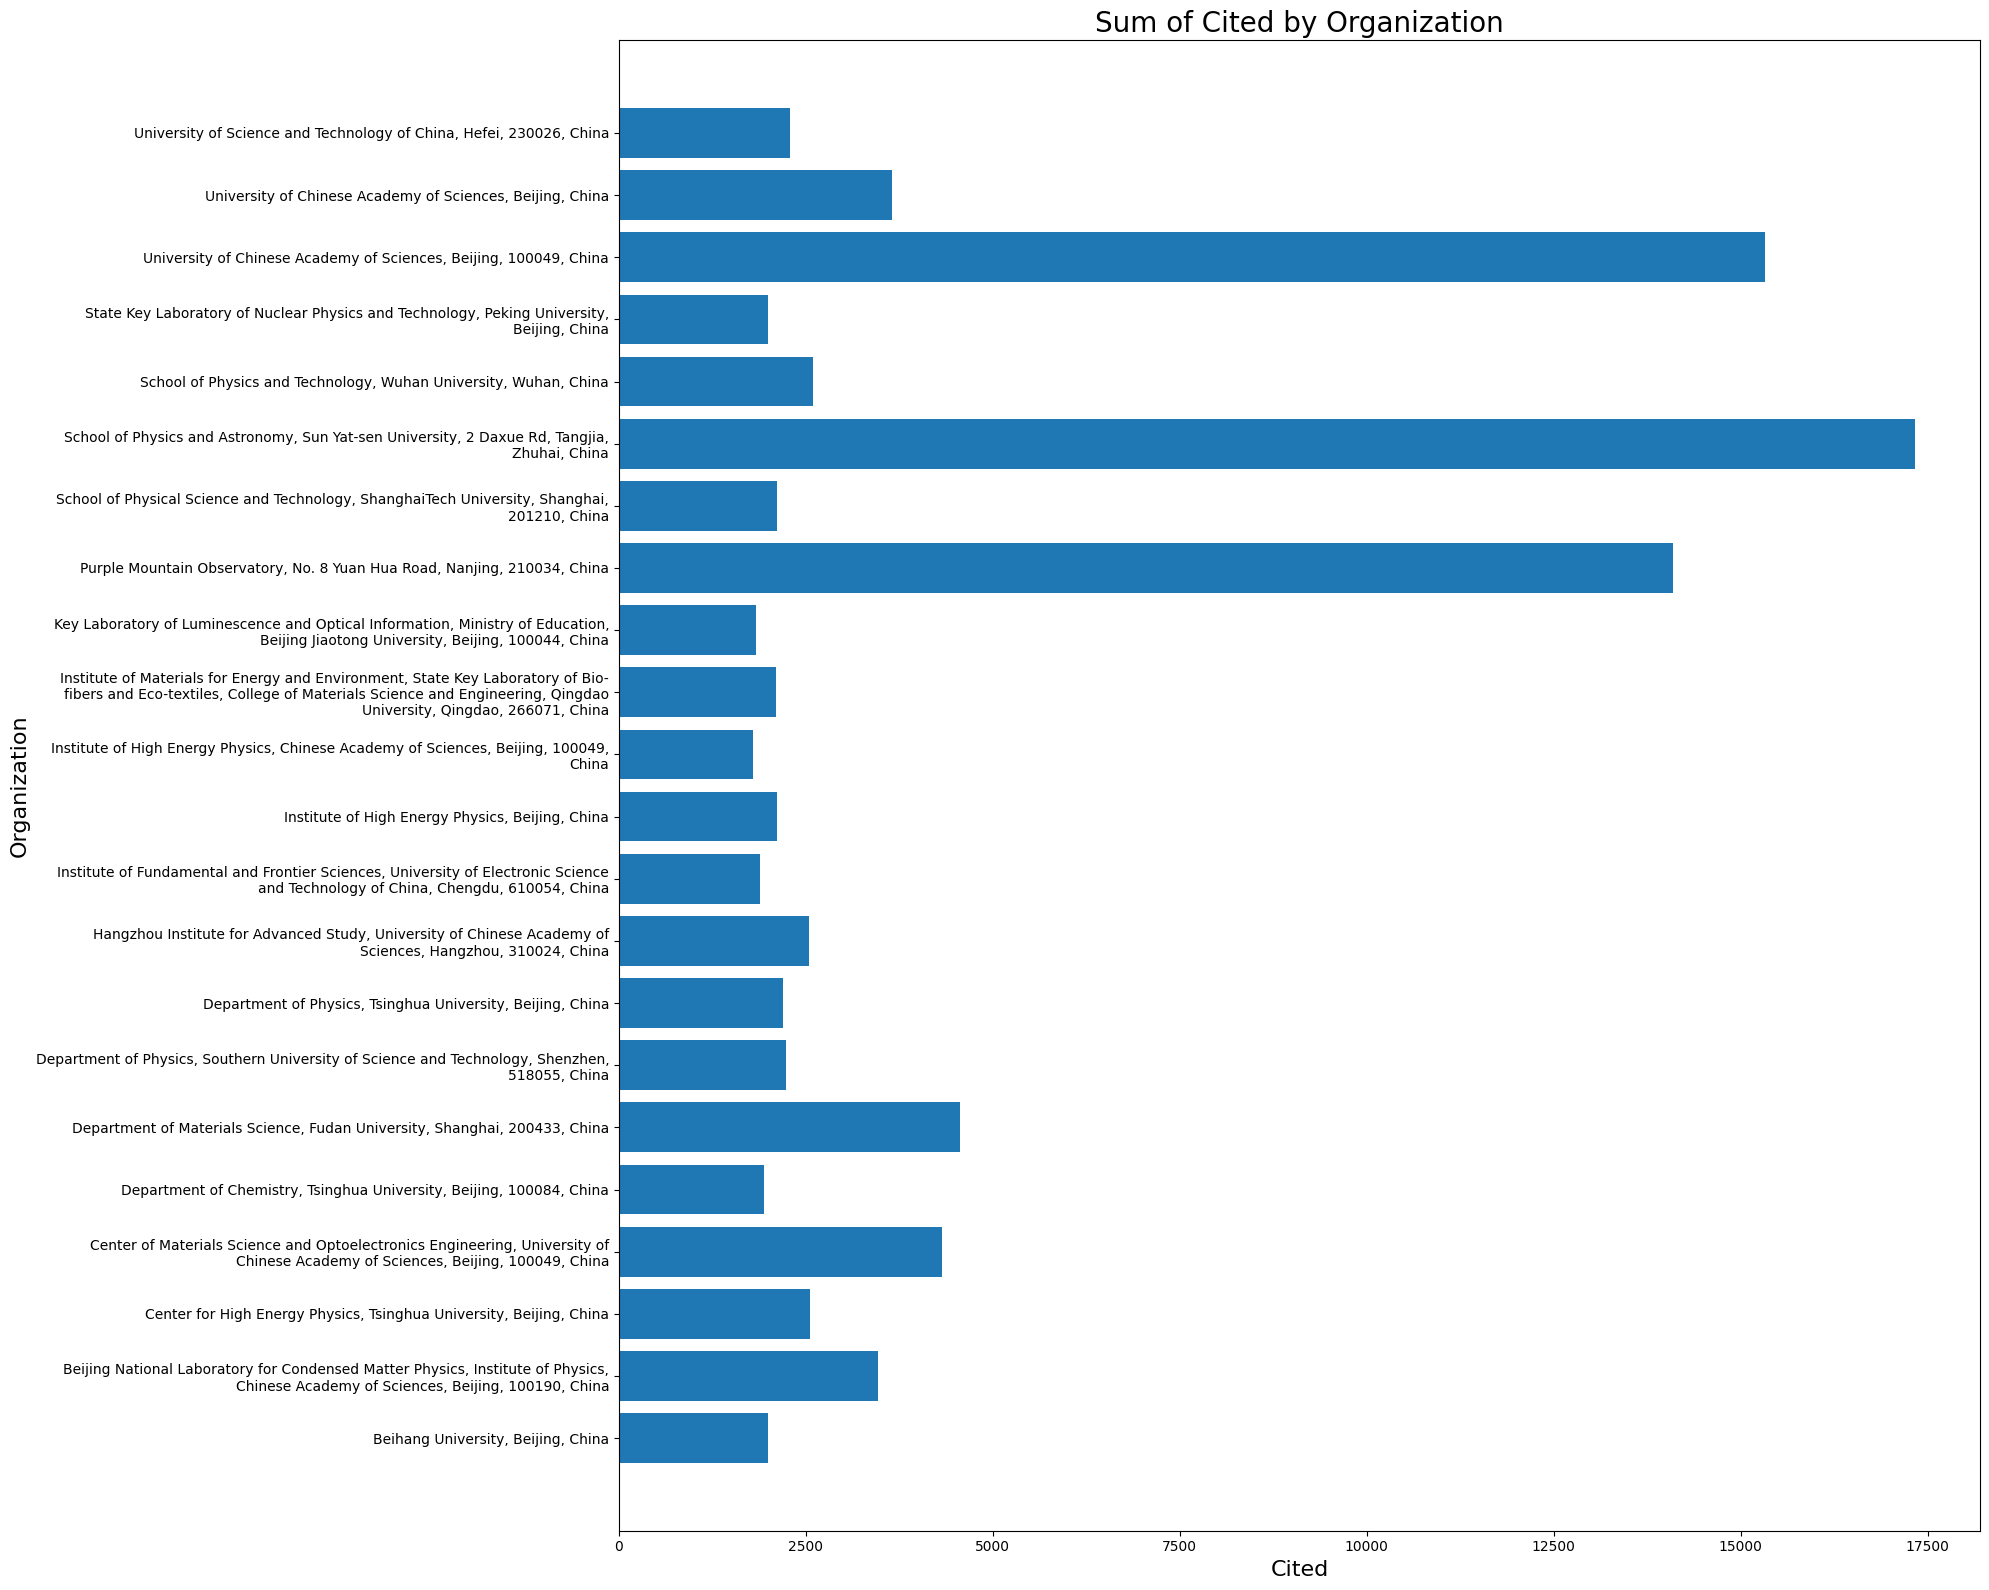

In [8]:
def wrap_labels(labels, width):
    return [textwrap.fill(label, width) for label in labels]

wrapped_orgs = wrap_labels(df_filtered['Orgs'], width=80)

plt.figure(figsize=(20, 16))
plt.barh(wrapped_orgs, df_filtered['Cited'])
plt.xlabel('Cited', fontsize=16)
plt.ylabel('Organization', fontsize=16)
plt.title('Sum of Cited by Organization', fontsize=20)
plt.tight_layout()
plt.show()

In [28]:
cities = ['Beijing', 'Shanghai', 'Shenzhen', 'Hangzhou', 'Chengdu', 'Qingdao', 'Nanjing', 'Zhuhai', 'Wuhan', 'Hefei']

# Создание новой колонки с городами
# Предполагается, что названия организаций содержат названия городов
def get_city(org_name):
    for city in cities:
        if city in org_name:
            return city
    return None

# Применение функции для создания новой колонки с городами
df_filtered['City'] = df_filtered['Orgs'].apply(get_city)

# Удаление строк с пустыми городами
df_filtered_cities = df_filtered.dropna(subset=['City'])

# Группировка по городам и суммирование количества цитирований
df_city_grouped = df_filtered_cities.groupby('City')['Cited'].sum().reset_index()

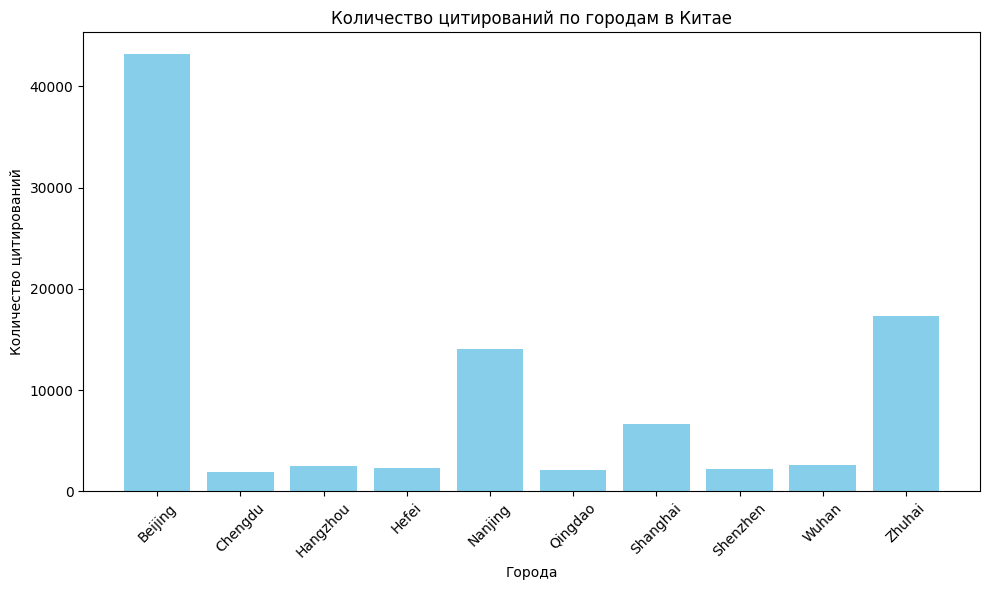

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(df_city_grouped['City'], df_city_grouped['Cited'], color='skyblue')
plt.xlabel('Города')
plt.ylabel('Количество цитирований')
plt.title('Количество цитирований по городам в Китае')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [91]:
df2 = df.copy()

df2['Names'] = df2['Names'].str.split(';')
df_expanded = df2.explode('Names')

# Удаление пробелов в именах авторов
df_expanded['Names'] = df_expanded['Names'].str.strip()



In [92]:
# Группировка по авторам и суммирование количества цитирований
df_grouped = df_expanded.groupby('Names')['Cited'].sum().reset_index()

# Нахождение максимального количества цитирований
max_cited = df_grouped['Cited'].max()

# Установка порога (75% от максимального количества цитирований)
threshold = max_cited * 0.9

# Фильтрация авторов по количеству цитирований
df_filtered_truncated = df_grouped[df_grouped['Cited'] >= threshold]

In [93]:
df_filtered_truncated

,Names,Cited
749,"Akrami, Y. (35387346400)",17480.0
2119,"Ashdown, M. (6603626885)",17526.0
2271,"Aumont, J. (57195496279)",17412.0
2481,"Baccigalupi, C. (57220414927)",17480.0
3240,"Ballardini, M. (56818885600)",17480.0
...,...,...
120578,"Wandelt, B.D. (7004256499)",17406.0
132585,"Wehus, I.K. (6507205575)",17480.0
134474,"White, S.D.M. (16199171600)",16090.0
157297,"Zacchei, A. (56273947300)",17420.0


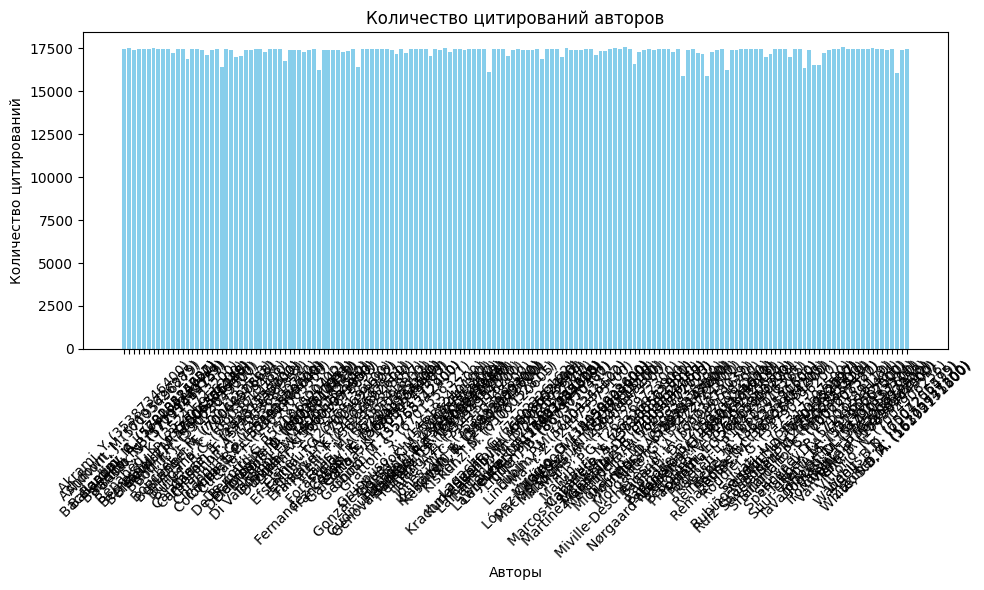

In [94]:
plt.figure(figsize=(10, 6))
plt.bar(df_filtered_truncated['Names'], df_filtered_truncated['Cited'], color='skyblue')
plt.xlabel('Авторы')
plt.ylabel('Количество цитирований')
plt.title('Количество цитирований авторов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()